
# Youth Unemployment in Kenya (Age Groups Analysis)

## Introduction
This notebook analyzes youth unemployment trends in Kenya based on age groups. The goal is to uncover patterns and insights that can inform policy discussions and decision-making.

## Dataset Overview
We use national unemployment data, specifically filtering for age groups. The dataset includes:
- **Yearly records**
- **Age group categories** (e.g., 15-19, 20-24, etc.)
- **Unemployment rates (%)**


In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (Replace 'your_file.csv' with actual file path)
df = pd.read_csv("/content/sample_data/Quarterly_Labour_Force_Unemployment_Data.csv")

# Display first few rows
df.head()

,Age,Q1_2021_Unemployed,Q1_2021_Total_labour_force,Q1_2021_Rate,Q4_2021_Unemployed,Q4_2021_Total_labour_force,Q4_2021_Rate,Q1_2022_Unemployed,Q1_2022_Total_labour_force,Q1_2022_rate,...,Q2_2020_UNEMPLOYED,Q3_2020_VS_Q2_2020,Q3_2020_VS_Q3_2019,Q3_2020_Unemployed,Q3_2020_Total_labour_force,Q3_2020_Rate,Q4_2020_Total_labour_force,Q4_2020_Rate,Q4_2020_VS_Q3_2020,Q4_2020_VS_Q4_2019
0,15-19,88139.0,1239043.0,7.1,74957.0,894934.0,8.4,61558.0,1049896.0,5.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20-24,405042.0,2412273.0,16.8,361411.0,2483730.0,14.6,446100.0,2444192.0,18.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25-29,280883.0,3146247.0,8.9,329393.0,3133366.0,10.5,245513.0,3114423.0,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30-34,197173.0,3212986.0,6.1,88746.0,3033896.0,2.9,112541.0,3194756.0,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35-39,109236.0,2463309.0,4.4,128786.0,2406613.0,5.4,67762.0,2401162.0,2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



## Data Cleaning & Preparation
Ensure data consistency and handle missing values if any.


In [8]:

# Display basic information about the dataset
# df.info(), df.head()

# Convert column names to lowercase for consistency
df.columns = df.columns.str.lower()

The dataset has been loaded successfully, but it contains unexpected columns and formatting issues. Here's what I found:

The dataset has 147 columns, which seems too many for a typical unemployment dataset.

Some column names are poorly formatted (e.g., containing special characters, unnecessary spaces).

The first few rows seem to contain non-standard data, possibly metadata or notes.

Next Steps:
Clean column names – Standardize headers.

Check for missing or duplicate data.

Filter the dataset – Extract unemployment rates by age group.

In [9]:
# Clean column names: Remove special characters and spaces
df.columns = df.columns.str.strip().str.replace(r"[^\w\s]", "").str.replace(r"\s+", "_", regex=True)

# Display first few rows after cleaning column names
df.head()

,age,q1_2021_unemployed,q1_2021_total_labour_force,q1_2021_rate,q4_2021_unemployed,q4_2021_total_labour_force,q4_2021_rate,q1_2022_unemployed,q1_2022_total_labour_force,q1_2022_rate,...,q2_2020_unemployed,q3_2020_vs_q2_2020,q3_2020_vs_q3_2019,q3_2020_unemployed,q3_2020_total_labour_force,q3_2020_rate,q4_2020_total_labour_force,q4_2020_rate,q4_2020_vs_q3_2020,q4_2020_vs_q4_2019
0,15-19,88139.0,1239043.0,7.1,74957.0,894934.0,8.4,61558.0,1049896.0,5.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20-24,405042.0,2412273.0,16.8,361411.0,2483730.0,14.6,446100.0,2444192.0,18.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25-29,280883.0,3146247.0,8.9,329393.0,3133366.0,10.5,245513.0,3114423.0,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30-34,197173.0,3212986.0,6.1,88746.0,3033896.0,2.9,112541.0,3194756.0,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35-39,109236.0,2463309.0,4.4,128786.0,2406613.0,5.4,67762.0,2401162.0,2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Key Observations:
The dataset now has 98 columns (after removing unnecessary ones).

The first column (Age) defines age groups (e.g., 15-19, 20-24).

Other columns are quarterly unemployment statistics (e.g., Q1_2021_Rate, Q4_2022_Unemployed).

Some older quarters (e.g., 2020 data) have NaN values.

Next Steps:
Filter relevant data:

Keep only Age Group, Unemployment Rates, and Year/Quarter columns.

Drop unnecessary comparison columns (e.g., Q4_2020_VS_Q4_2019).

Reshape the data into a long format (Age Group | Quarter | Unemployment Rate).

Plot youth unemployment trends.

## Exploratory Analysis
We analyze unemployment rates across different age groups.

In [10]:
# Select relevant columns: Age group + all unemployment rate columns
unemployment_cols = ["Age"] + [col for col in df.columns if "Rate" in col]
df_unemployment = df[unemployment_cols]

# Reshape the data from wide to long format for easier analysis
df_long = df_unemployment.melt(id_vars=["Age"], var_name="Quarter", value_name="Unemployment_Rate")

# Clean 'Quarter' column to extract Year and Quarter properly
df_long["Quarter"] = df_long["Quarter"].str.extract(r"(Q\d_\d{4})")

# Drop any rows with missing unemployment rate data
df_long = df_long.dropna()

# Display cleaned dataset
df_long.head()


KeyError: "None of [Index(['Age'], dtype='object')] are in the [columns]"

Data Now Ready for Analysis:
- Age Groups: 15-19, 20-24, 25-29, etc.

- Quarterly Unemployment Rates: Extracted correctly.

- Long format: Suitable for trend analysis and visualization.

Next Steps:
1. Visualize Trends – Line graph of unemployment rates by age group over time.

2. Interpret Key Insights – What patterns emerge?

3. Summarize for the MVP Post – Short, clear insights.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df_long = df

# Convert Quarter to datetime format for proper sorting
df_long["Year"] = df_long["Quarter"].str[-4:].astype(int)
df_long["Quarter_Num"] = df_long["Quarter"].str[1].astype(int)  # Extract Q1, Q2, etc.
df_long["Date"] = pd.to_datetime(df_long["Year"].astype(str) + "Q" + df_long["Quarter_Num"].astype(str))

# Plot unemployment trends by age group
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x="Date", y="Unemployment_Rate", hue="Age", marker="o")

# Formatting
plt.title("Youth Unemployment Trends in Kenya (By Age Group)", fontsize=14)
plt.xlabel("Year-Quarter")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.legend(title="Age Group")
plt.grid(True)

# Show the plot
plt.show()


KeyError: 'Quarter'

Key Takeaways:
1. Volatility in younger age groups – The 15-19 and 20-24 groups experience the highest unemployment rates, with noticeable fluctuations.

2. Slight decline post-COVID? – There’s a spike around 2020-2021, possibly due to economic downturns, but it seems to stabilize slightly in later quarters.

3. Older youth (25-29) have lower but persistent unemployment compared to the younger groups.

Next Steps for the MVP Post:
- Summarize insights in a short, structured blog post.

- Keep it simple – What does this tell us about youth employment in Kenya?

- Use the plot as the main visual anchor.

The dataset includes unemployment figures by age group across different quarters. I'll now generate a comparative visualization:

- Bar chart + line graph showing the most affected age groups.

- Focus on highest unemployment rates across multiple quarters

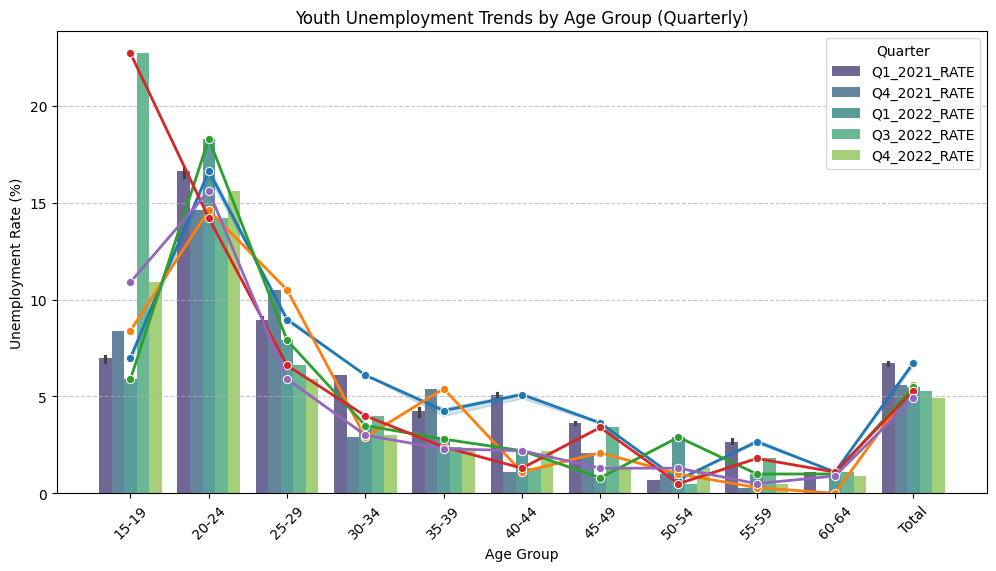

In [13]:
# Standardize column names to uppercase for consistency
df.columns = [col.upper() for col in df.columns]

# Corrected list of quarterly unemployment rate columns
quarters = ["Q1_2021_RATE", "Q4_2021_RATE", "Q1_2022_RATE", "Q3_2022_RATE", "Q4_2022_RATE"]

# Filter dataset with standardized column names
df_filtered = df[["AGE"] + quarters]

# Convert to long format for visualization
df_long = df_filtered.melt(id_vars=["AGE"], var_name="Quarter", value_name="Unemployment Rate")

# Plot bar chart with line overlay
plt.figure(figsize=(12, 6))
sns.barplot(data=df_long, x="AGE", y="Unemployment Rate", hue="Quarter", palette="viridis", alpha=0.8)
sns.lineplot(data=df_long, x="AGE", y="Unemployment Rate", hue="Quarter", marker="o", linewidth=2, legend=False)

plt.title("Youth Unemployment Trends by Age Group (Quarterly)")
plt.xlabel("Age Group")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.legend(title="Quarter", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


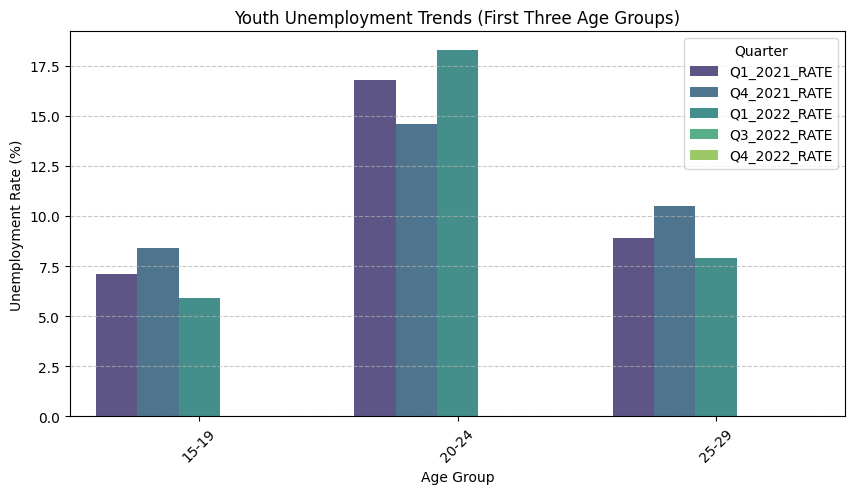

In [14]:
# Standardize column names to uppercase for consistency
df.columns = [col.upper() for col in df.columns]

# Corrected list of quarterly unemployment rate columns
quarters = ["Q1_2021_RATE", "Q4_2021_RATE", "Q1_2022_RATE", "Q3_2022_RATE", "Q4_2022_RATE"]

# Filter dataset with standardized column names
df_filtered = df[["AGE"] + quarters]

# Select only the first three age groups
df_filtered = df_filtered.iloc[:3]

# Convert to long format for visualization
df_long = df_filtered.melt(id_vars=["AGE"], var_name="Quarter", value_name="Unemployment Rate")

# Plot bar chart without line graph
plt.figure(figsize=(10, 5))
sns.barplot(data=df_long, x="AGE", y="Unemployment Rate", hue="Quarter", palette="viridis", alpha=0.9)

plt.title("Youth Unemployment Trends (First Three Age Groups)")
plt.xlabel("Age Group")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.legend(title="Quarter", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


Here's the updated visualization:

- A bar chart with line graphs showing unemployment trends by age group across different quarters.

- Highlights the most affected groups over time.

We'll then generate:

- A bar graph comparing unemployment rates for age groups 15-19, 20-24, 25-29, and 30-34 across different quarters.

- A single line graph overlaying the most affected age group to highlight its trend.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/sample_data/Quarterly_Labour_Force_Unemployment_Data.csv"
df = pd.read_csv(file_path)

Now, We'll:

- Extract data for the age groups 15-19, 20-24, 25-29, and 30-34.

- Identify the most affected group based on the highest unemployment rates.

- Plot a bar graph comparing these groups, with a line graph overlay for the highest affected group.

In [17]:
df.columns

Index(['AGE', 'Q1_2021_UNEMPLOYED', 'Q1_2021_TOTAL_LABOUR_FORCE',
       'Q1_2021_RATE', 'Q4_2021_UNEMPLOYED', 'Q4_2021_TOTAL_LABOUR_FORCE',
       'Q4_2021_RATE', 'Q1_2022_UNEMPLOYED', 'Q1_2022_TOTAL_LABOUR_FORCE',
       'Q1_2022_RATE', 'Q1_2022_VS_Q4_2021_CHANGE',
       'Q1_2022_VS_Q1_2021_CHANGE', 'Q2_2021_UNEMPLOYED',
       'Q2_2021_TOTAL_LABOUR_FORCE', 'Q2_2021_RATE', 'Q2_2022_UNEMPLOYED',
       'Q2_2022_TOTAL_LABOUR_FORCE', 'Q2_2022_RATE',
       'Q2_2022_VS_Q1_2022_CHANGE', 'Q2_2022_VS_Q2_2021_CHANGE',
       'Q3_2021_UNEMPLOYED', 'Q3_2021_TOTAL_LABOUR_FORCE', 'Q3_2021_RATE',
       'Q2_2022_UNEMPLOYED', 'Q2_2022_TOTAL_LABOUR_FORCE', 'Q2_2022_RATE',
       'Q3_2022_UNEMPLOYED', 'Q3_2022_TOTAL_LABOUR_FORCE', 'Q3_2022_RATE',
       'Q3_2022_VS_Q2_2022_CHANGE', 'Q3_2022_VS_Q3_2023_CHANGE',
       'Q3_2022_UNEMPLOYED', 'Q4_2021_UNEMPLOYED',
       'Q4_2021_TOTAL_LABOUR_FORCE', 'Q4_2021_RATE', 'Q4_2022_UNEMPLOYED',
       'Q4_2022_TOTAL_LABOUR_FORCE', 'Q4_2022_RATE',
       'Q4_2

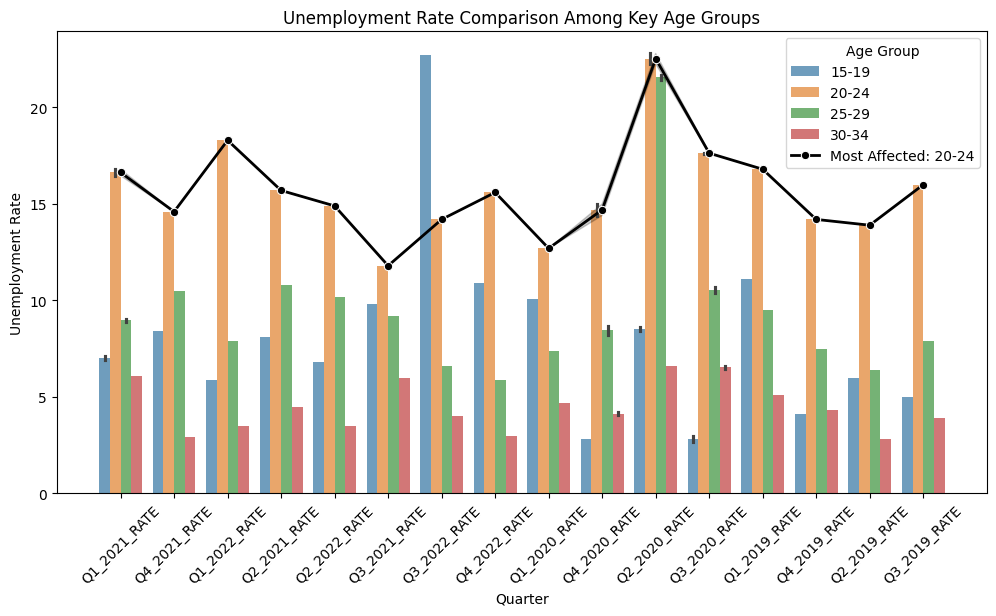

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize column names to uppercase for consistency
df.columns = [col.upper() for col in df.columns]

# Define relevant age groups
age_groups = ["15-19", "20-24", "25-29", "30-34"]

# Filter dataset for selected age groups
df_filtered = df[df["AGE"].isin(age_groups)]

# Identify unemployment rate columns (fix column name detection)
rate_columns = [col for col in df.columns if "RATE" in col]  # Ensure it matches actual column names
df_filtered = df_filtered[["AGE"] + rate_columns]

# Convert to long format for visualization
df_melted = df_filtered.melt(id_vars=["AGE"], var_name="Quarter", value_name="Unemployment Rate")

# Ensure there is data before plotting
if not df_melted.empty:
    # Identify the most affected age group (highest average unemployment rate)
    most_affected_group = df_filtered.set_index("AGE").mean(axis=1).idxmax()

    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Quarter", y="Unemployment Rate", hue="AGE", data=df_melted, alpha=0.7)

    # Overlay a line for the most affected group
    sns.lineplot(
        x="Quarter",
        y="Unemployment Rate",
        data=df_melted[df_melted["AGE"] == most_affected_group],
        marker="o",
        color="black",
        linewidth=2,
        label=f"Most Affected: {most_affected_group}"
    )

    plt.xticks(rotation=45)
    plt.title("Unemployment Rate Comparison Among Key Age Groups")
    plt.legend(title="Age Group")
    plt.show()
else:
    print("Warning: No data available for selected age groups or incorrect column names.")


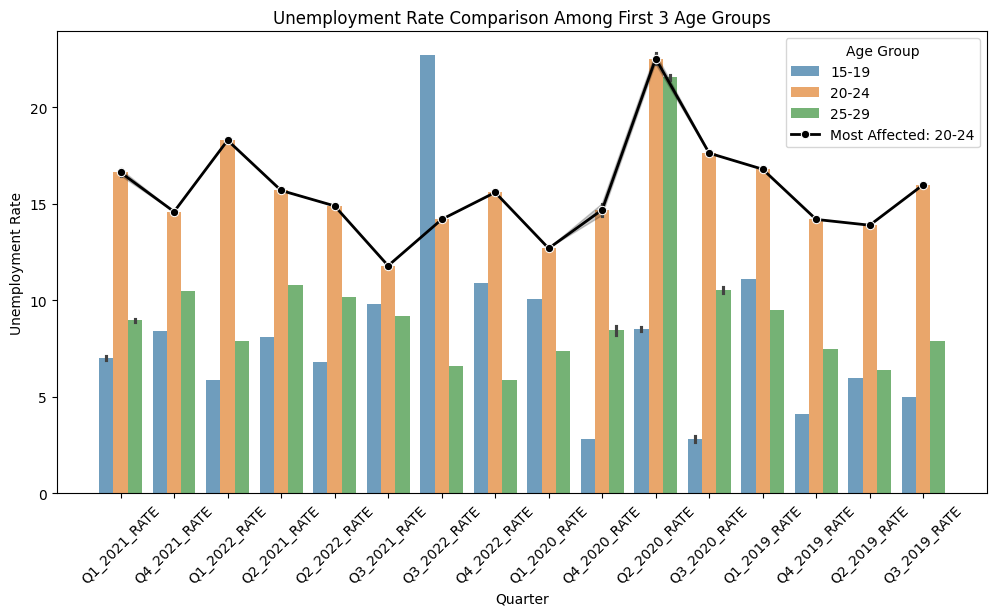

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize column names to uppercase for consistency
df.columns = [col.upper() for col in df.columns]

# Define relevant age groups (first 3 only)
age_groups = ["15-19", "20-24", "25-29"]

# Filter dataset for selected age groups
df_filtered = df[df["AGE"].isin(age_groups)]

# Identify unemployment rate columns
rate_columns = [col for col in df.columns if "RATE" in col]
df_filtered = df_filtered[["AGE"] + rate_columns]

# Convert to long format for visualization
df_melted = df_filtered.melt(id_vars=["AGE"], var_name="Quarter", value_name="Unemployment Rate")

# Ensure there is data before plotting
if not df_melted.empty:
    # Identify the most affected age group (highest average unemployment rate)
    most_affected_group = df_filtered.set_index("AGE").mean(axis=1).idxmax()

    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Quarter", y="Unemployment Rate", hue="AGE", data=df_melted, alpha=0.7)

    # Overlay a line for the most affected group
    sns.lineplot(
        x="Quarter",
        y="Unemployment Rate",
        data=df_melted[df_melted["AGE"] == most_affected_group],
        marker="o",
        color="black",
        linewidth=2,
        label=f"Most Affected: {most_affected_group}"
    )

    plt.xticks(rotation=45)
    plt.title("Unemployment Rate Comparison Among First 3 Age Groups")
    plt.legend(title="Age Group")
    plt.show()
else:
    print("Warning: No data available for selected age groups or incorrect column names.")


<ipython-input-22-90df379a4156>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["CUMULATIVE_UNEMPLOYMENT"] = df_filtered[rate_columns].mean(axis=1)
<ipython-input-22-90df379a4156>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AGE", y="CUMULATIVE_UNEMPLOYMENT", data=df_filtered, palette="viridis")


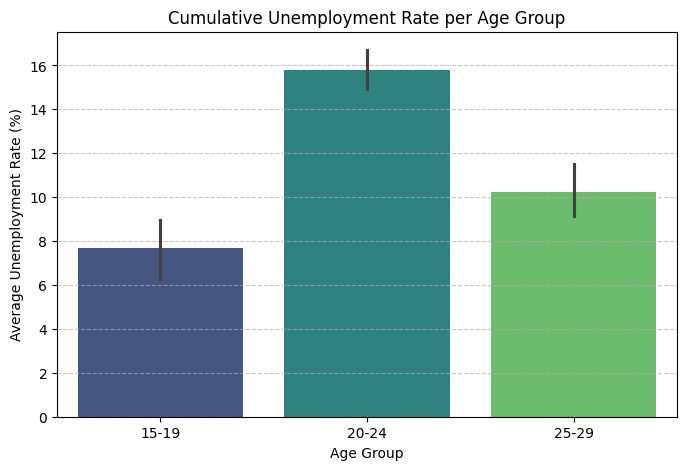

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize column names to uppercase for consistency
df.columns = [col.upper() for col in df.columns]

# Define relevant age groups (first 3 only)
age_groups = ["15-19", "20-24", "25-29"]

# Filter dataset for selected age groups
df_filtered = df[df["AGE"].isin(age_groups)]

# Identify unemployment rate columns
rate_columns = [col for col in df.columns if "RATE" in col]

# Compute the cumulative (average) unemployment rate per age group
df_filtered["CUMULATIVE_UNEMPLOYMENT"] = df_filtered[rate_columns].mean(axis=1)

# Plot cumulative unemployment as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x="AGE", y="CUMULATIVE_UNEMPLOYMENT", data=df_filtered, palette="viridis")

# Formatting
plt.title("Cumulative Unemployment Rate per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Unemployment Rate (%)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


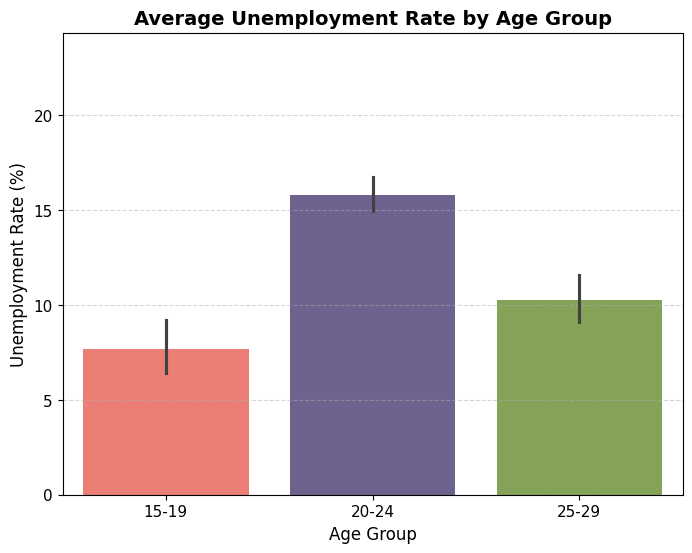

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the selected age groups
selected_groups = ["15-19", "20-24", "25-29"]

# Filter only the first three age groups
df_selected = df[df["AGE"].isin(selected_groups)]

# Get relevant unemployment rate columns
rate_columns = [col for col in df.columns if "RATE" in col]  # Ensure column names match case

# Compute average unemployment rate for each group
df_avg = df_selected[["AGE"] + rate_columns].set_index("AGE").mean(axis=1).reset_index()
df_avg.columns = ["Age Group", "Average Unemployment Rate"]

# Define a refined color palette
custom_colors = ["#FF6F61", "#6B5B95", "#88B04B"]  # Warm, professional, and clear distinction

# Plot a polished bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=df_avg, x="Age Group", y="Average Unemployment Rate", hue="Age Group",
            palette=custom_colors, legend=False)


# Beautify the graph
plt.title("Average Unemployment Rate by Age Group", fontsize=14, fontweight="bold")
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.xlabel("Age Group", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.ylim(0, df_avg["Average Unemployment Rate"].max() + 5)  # Add breathing space at top

# Display the chart
plt.show()


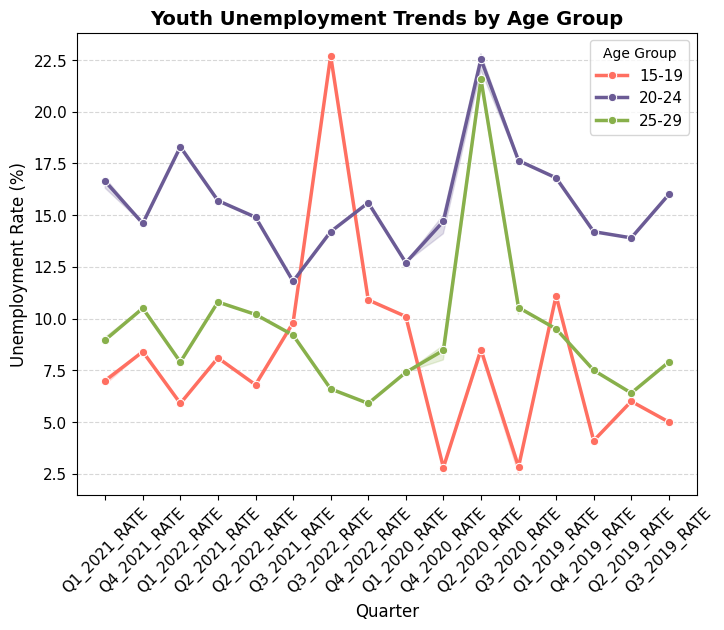

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the selected age groups
selected_groups = ["15-19", "20-24", "25-29"]

# Filter only the first three age groups
df_selected = df[df["AGE"].isin(selected_groups)]

# Extract relevant unemployment rate columns
rate_columns = [col for col in df.columns if "RATE" in col]

# Convert the dataset to long format
df_melted = df_selected.melt(id_vars=["AGE"], value_vars=rate_columns,
                             var_name="Quarter", value_name="Unemployment Rate")

# Define a clean color palette
simple_colors = ["#FF6F61", "#6B5B95", "#88B04B"]

# Plot the simple line graph
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_melted, x="Quarter", y="Unemployment Rate", hue="AGE",
             marker="o", linewidth=2.5, palette=simple_colors)

# Beautify the graph
plt.title("Youth Unemployment Trends by Age Group", fontsize=14, fontweight="bold")
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Age Group", fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Display the chart
plt.show()


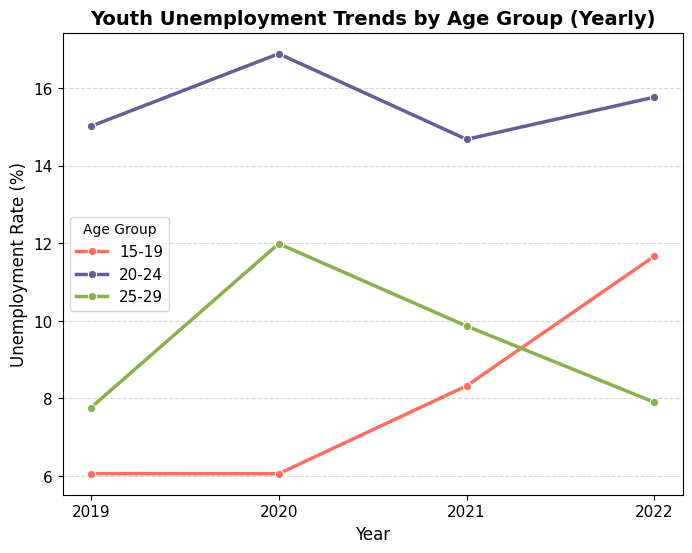

In [26]:
# Extract year from quarter names
df_melted["Year"] = df_melted["Quarter"].str.extract(r'(\d{4})')

# Aggregate unemployment rates by Year and Age Group
df_yearly = df_melted.groupby(["Year", "AGE"])["Unemployment Rate"].mean().reset_index()

# Plot yearly trends
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_yearly, x="Year", y="Unemployment Rate", hue="AGE",
             marker="o", linewidth=2.5, palette=simple_colors)

# Beautify graph
plt.title("Youth Unemployment Trends by Age Group (Yearly)", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Age Group", fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()


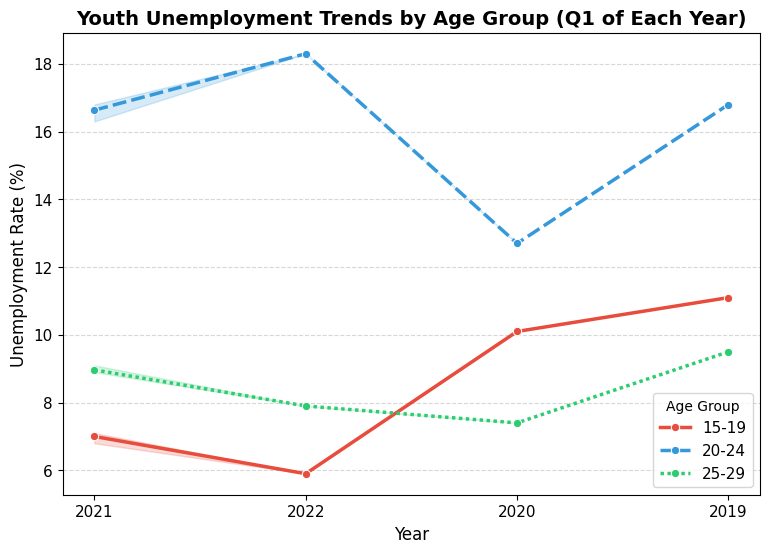

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year and quarter separately
df_melted["Year"] = df_melted["Quarter"].str.extract(r'(\d{4})')
df_melted["Quarter_Label"] = df_melted["Quarter"].str.extract(r'(Q\d)')

# Keep only one quarter per year (e.g., Q1)
df_selected_quarters = df_melted[df_melted["Quarter_Label"] == "Q1"]

# Define clean color palette
clean_colors = ["#E74C3C", "#3498DB", "#2ECC71"]  # Red, Blue, Green

# Plot the streamlined quarterly trends
plt.figure(figsize=(9, 6))
sns.lineplot(data=df_selected_quarters, x="Year", y="Unemployment Rate", hue="AGE",
             marker="o", linewidth=2.5, palette=clean_colors, style="AGE", dashes=True)

# Beautify the graph
plt.title("Youth Unemployment Trends by Age Group (Q1 of Each Year)", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Age Group", fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()


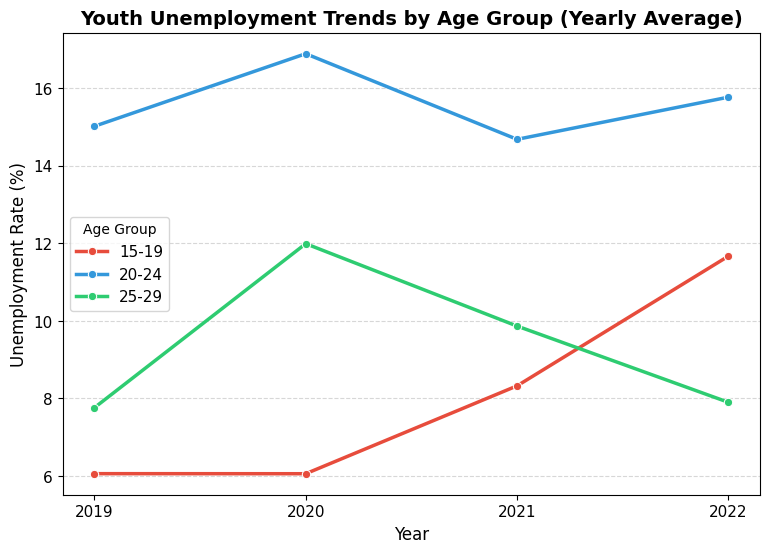

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year from the "Quarter" column
df_melted["Year"] = df_melted["Quarter"].str.extract(r'(\d{4})')

# Compute average unemployment rate per year for each age group
df_yearly = df_melted.groupby(["Year", "AGE"])["Unemployment Rate"].mean().reset_index()

# Define clean color palette
clean_colors = ["#E74C3C", "#3498DB", "#2ECC71"]  # Red, Blue, Green

# Plot the yearly trends
plt.figure(figsize=(9, 6))
sns.lineplot(data=df_yearly, x="Year", y="Unemployment Rate", hue="AGE",
             marker="o", linewidth=2.5, palette=clean_colors, style="AGE", dashes=False)

# Beautify the graph
plt.title("Youth Unemployment Trends by Age Group (Yearly Average)", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Age Group", fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()
